# Intermittent control as a model of mouse movements 

This notebook provides a visualisation of the Intermittent Control (IC) cost used during the optimisation for both the full and reduced set of parameters. The filed were generated in MATLAB and it is imported to Python using a Pandas dataframe. 

This notebook is part of the supplemental material for publication in ACM Transactions on Computer-Human Interaction (https://dl.acm.org/journal/tochi)

This work is based on the results of the following paper:

- Müller, Jörg, Antti Oulasvirta, and Roderick Murray-Smith. "Control
theoretic models of pointing." ACM Transactions on Computer-Human
Interaction (TOCHI) 24, no. 4 (2017): 27.

### Requirements

Please install the CRETools-0.1.0 package before running this jupyter
notebook as follows:

* Go to the folder CRETools-0.1.0 and build the package with: python setup.py sdist
* In the same folder, use the following line to install it: python setup.py install

The notebook also needs the following dependencies:

* numpy (https://numpy.org/)
* seaborn (https://seaborn.pydata.org/)
* pandas (https://pandas.pydata.org/)
* scipy (https://www.scipy.org/)

# 1. Load the optimised parameters of the full and reduced parameter sets

The first step is to read the data files that contain all the parameters for all participants, for both the reduced and full parameter sets. Once loaded, a Pandas dataframe (df) is created. The following cell assigns names to each column of the dataframe and performs some necessary operations on the data.

In [1]:
# --- Load libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import copy
import scipy.io as spio
from scipy import stats
from cre import io as loader

%matplotlib inline

# --- Paper context for Seaborn
sns.set(style='white', context='paper', font_scale=1.5, rc={'figure.figsize':(12, 8), 'figure.facecolor':'w'})

# FULL PARAMETER SET

# --- Load data file (generated using matlab)
df = loader.loadmat(r'data_files/opt_data_full_20200111T075641.mat')

# --- Create pandas dataframe df
df = pd.DataFrame(df['df'])
df.columns = ["Participant", "Slice", "Threshold", "Ap","OL","Qc1","Qc2","Qc3","Qc4","Qo","k1","k2","k3","k4","J_slice","J_trial","Distance","Width","ID"]

# --- Change the mismatch gain to reflect the difference with respect to the true plant.
df['Ap'] = 1-df['Ap']

# --- Convert ID, distance, width, and Participant to integers only
df['ID'] = df['ID'].astype(int)
df['Distance'] = df['Distance'].astype(int)
df['Width'] = df['Width'].astype(int)
df['Participant'] = df['Participant'].astype(int)

# --- Removing large thresholds and OL's
df = df.drop(df[df.Threshold > 0.03].index)
df = df.drop(df[df.OL > 0.06].index)
df = df.drop(df[df.Ap < -0.3].index)
df = df.drop(df[df.J_slice > 0.025].index)
df = df.drop(df[df.J_trial > 0.04].index)

# REDUCED PARAMETER SET

# --- Load data file (generated using matlab)
dfr = loader.loadmat(r'data_files/opt_data_min_20201215T232437.mat') # All participants

# --- Create pandas dataframe df
dfr = pd.DataFrame(dfr['df'])
dfr.columns = ["Participant", "Slice", "Threshold", "Ap","OL","Qc1","Qc2","Qc3","Qc4","Qo","k1","k2","k3","k4","J_slice","J_trial","Distance","Width","ID"]

# --- Change the mismatch gain to reflect the difference with respect to the true plant.
dfr['Ap'] = 1-dfr['Ap']

# --- Convert ID, distance, width, and Participant to integers only
dfr['ID'] = dfr['ID'].astype(int)
dfr['Distance'] = dfr['Distance'].astype(int)
dfr['Width'] = dfr['Width'].astype(int)
dfr['Participant'] = dfr['Participant'].astype(int)

# --- Removing large thresholds and OL's
dfr = dfr.drop(dfr[dfr.OL > 0.06].index)
dfr = dfr.drop(dfr[dfr.Ap < -0.3].index)
dfr = dfr.drop(dfr[dfr.J_trial > 0.04].index)
dfr = dfr.drop(dfr[dfr.J_slice > 0.025].index)

# 2. Cost function J for each slice and over all trials

In this section, violin plots are presented with the cost function value over the individual slice (Cost(slice)) and over all trials for a particular ID (Cost(trial)), on both paramter sets (full vs reduced). These figures include parameters for all participants and conditions.

The x axis of all figures shows the four ID's of the experiment. Each side of the violin plot corresponds to the distribution of one of the two different distances between targets. The distribution on the left side is for a distance of 212mm, the one on the right is for 353mm.

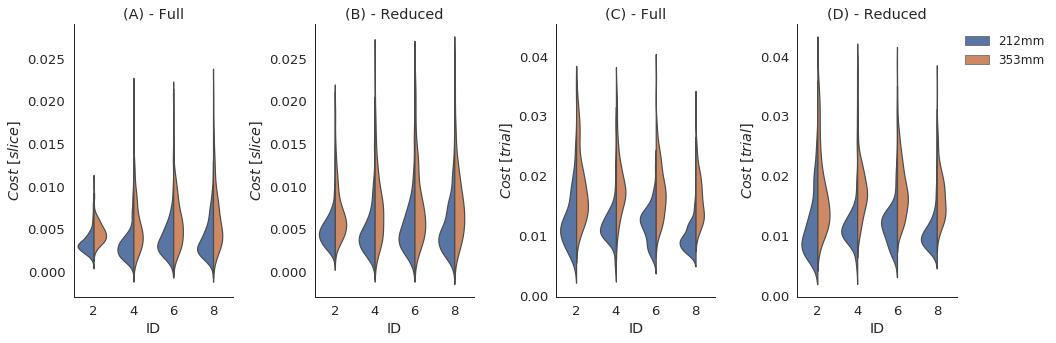

In [2]:
# --- These variables control the appearance of the violin plots
bw_kde = 'silverman'    # Automatic bandwidth selection by Silverman's method.
cut_data = 2;           # 2 is the default
y_suptitle = 1.02
 
# --- Labels
title_labels = ['(A) - Full','(B) - Reduced','(C) - Full','(D) - Reduced']; 
axis_labels_J = ['$Cost$ $[slice]$', '$Cost$ $[slice]$', '$Cost$ $[trial]$', '$Cost$ $[trial]$']

fig, axes = plt.subplots(figsize=(15, 5))
ymin_all = []; ymax_all = []; g_all = []

def violin_costs(y, data, cut_data, bw_kde, title_labels, i):
    g = sns.violinplot(x="ID", y=y, hue="Distance", data=data, cut = cut_data, 
                       bw = bw_kde, split=True, inner=None)
    g_all.append(g)
    y_min, y_max = g.axes.get_ylim()
    ymin_all.append(y_min); ymax_all.append(y_max)
    ax = plt.gca()
    ax.set_title(title_labels[i-1])
    ax.set_ylabel(axis_labels_J[i-1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.legend_ = None
    return ax

# Slice - Full
i = 1
plt.subplot(1,4,i)
ax = violin_costs("J_slice", df, cut_data, bw_kde, title_labels, i)

# Slice - Reduced
i = 2
plt.subplot(1,4,i)
ax = violin_costs("J_slice", dfr, cut_data, bw_kde, title_labels, i)

g_all[0].axes.set_ylim(min(ymin_all),max(ymax_all)) 
g_all[1].axes.set_ylim(min(ymin_all),max(ymax_all)) 

ymin_all = []; ymax_all = []; g_all = []

# Trial - Full
i = 3
plt.subplot(1,4,i)
ax = violin_costs("J_trial", df, cut_data, bw_kde, title_labels, i)

# Trial - Reduced
i = 4
plt.subplot(1,4,i)
ax = violin_costs("J_trial", dfr, cut_data, bw_kde, title_labels, i)
plt.legend(['212mm', '353mm'], prop={'size': 12}, frameon=False, loc='upper center', bbox_to_anchor=(1.3, 1))

g_all[0].axes.set_ylim(min(ymin_all),max(ymax_all)) 
g_all[1].axes.set_ylim(min(ymin_all),max(ymax_all)) 
    
fig.tight_layout()